In [1]:
# Import Dependenices 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn style
sns.set_style('whitegrid')
# Import More Dependenices 
%matplotlib inline
import matplotlib
from datetime import datetime
# warnings 
import warnings
warnings.filterwarnings("ignore")

# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import json 
import csv

In [2]:
#Read CSV XRP
xrp_csv = pd.read_csv("resources/XRPUSD.csv")
xrp_csv.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06


In [3]:
# Read CSV bitcoin 
btc_csv = pd.read_csv("resources/BTCUSD.csv")
btc_csv.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1643846400,2022-02-03 00:00:00,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02 00:00:00,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01 00:00:00,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31 00:00:00,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30 00:00:00,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [4]:
#Read CSV ethereum
eth_csv = pd.read_csv("resources/ETHUSD.csv")
eth_csv.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03 00:00:00,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02 00:00:00,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01 00:00:00,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31 00:00:00,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30 00:00:00,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [5]:
#Read CSV LTC 
ltc_csv = pd.read_csv("resources/LTCUSD.csv")
ltc_csv.head()

,unix,date,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03 00:00:00,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [6]:
#Merge XRP & BTC
combined_xrp_btc_df = pd.merge(xrp_csv, btc_csv, on=["unix","date"])
combined_xrp_btc_df.head()

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume XRP,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume BTC,Volume USD_y
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [7]:
#rename columns 
combined_xrp_btc_df = combined_xrp_btc_df.rename(columns={"symbol_x":"XRP Symbol",
                                                          "open_x":"XRP Open",
                                                          "high_x":"XRP High", 
                                                          "low_x":"XRP Low",
                                                         "close_x": "XRP Close",
                                                         "Volume USD_x":"XRP Volume USD",
                                                         "symbol_y":"BTC Symbol",
                                                          "open_y":"BTC Open",
                                                          "high_y":"BTC High", 
                                                          "low_y":"BTC Low",
                                                         "close_y": "BTC Close",
                                                         "Volume USD_y":"BTC Volume USD"})
combined_xrp_btc_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [8]:
combined_three_df = pd.merge(combined_xrp_btc_df, eth_csv, on=["unix","date"])
combined_three_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,BTC Close,Volume BTC,BTC Volume USD,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,36914.82,22.073478,8.148385e+05,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,36923.50,1672.707195,6.176220e+07,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,38733.04,2073.938717,8.032995e+07,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,38491.92,2009.130003,7.733527e+07,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,37941.82,708.794813,2.689297e+07,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [9]:
#rename columns 
combined_three_df = combined_three_df.rename(columns={"symbol":"ETH Symbol",
                                                          "open":"ETH Open",
                                                          "high":"ETH High", 
                                                          "low":"ETH Low",
                                                         "close": "ETH Close",
                                                         "Volume USD":"ETH Volume USD",
                                                         })
combined_xrp_btc_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [10]:
#last merge
combined_final_df = pd.merge(combined_three_df, ltc_csv, on=["unix","date"])
combined_final_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [11]:
#rename columns 
combined_final_df = combined_final_df.rename(columns={"symbol":"LTC Symbol",
                                                          "open":"LTC Open",
                                                          "high":"LTC High", 
                                                          "low":"LTC Low",
                                                         "close": "LTC Close",
                                                         "Volume USD":"LTC Volume USD",
                                                         })
combined_final_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00


In [12]:
#clean up columns don't need, didn't need symbols for 4 columns
cleaned_df = combined_final_df.drop(columns=['unix','XRP Symbol','BTC Symbol','ETH Symbol','LTC Symbol'])
cleaned_df.head()

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,2022-02-03 00:00:00,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,36924.50,37039.89,36803.54,...,2667.11,2697.13,159.102953,4.291213e+05,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,2022-02-02 00:00:00,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,38768.08,38883.96,36618.36,...,2608.78,2682.30,20322.411654,5.451080e+07,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,2022-02-01 00:00:00,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,38483.56,39285.00,38033.78,...,2676.98,2791.04,29375.252979,8.198751e+07,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,2022-01-31 00:00:00,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,37914.10,38776.33,36631.66,...,2479.78,2688.91,27255.629475,7.328793e+07,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,2022-01-30 00:00:00,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,38176.45,38378.88,37372.59,...,2543.64,2602.37,8359.759751,2.175519e+07,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [13]:
# Collecting best open for XRP, BTC, LTC & ETH
xrp_open = cleaned_df["XRP Open"].max()
btc_open = cleaned_df["BTC Open"].max()
eth_open = cleaned_df["ETH Open"].max()
ltc_open = cleaned_df["LTC Open"].max()

# Collecting best close for XRP, BTC, LTC & ETH
xrp_close = cleaned_df["XRP Close"].max()
btc_close = cleaned_df["BTC Close"].max()
eth_close = cleaned_df["ETH Close"].max()
ltc_close = cleaned_df["LTC Close"].max()

# Collecting the total volume for XRP, BTC, LTC & ETH
xrp_volume = round(cleaned_df["Volume XRP"].sum()/1000000, 2)
btc_volume = round(cleaned_df["Volume BTC"].sum()/1000000, 2)
eth_volume = round(cleaned_df["Volume ETH"].sum()/1000000, 2)
ltc_volume = round(cleaned_df["Volume LTC"].sum()/1000000, 2)



In [14]:
# Creating a summary DataFrame using above values
summary_df = pd.DataFrame({"Best XRP Open": [xrp_open],
                           "Best XRP Close": [xrp_close],
                           "Total XRP Volume": str(xrp_volume)+" million",
                           "Best BTC Open": [btc_open],
                           "Best BTC Close": [btc_close],
                           "Total BTC Volume": str(btc_volume)+" million",
                           "Best ETH Open": [eth_open],
                           "Best ETH Close": [eth_close],
                           "Total ETH Volume": str(eth_volume)+" million",
                           "Best LTC Open": [ltc_open],
                           "Best LTC Close": [ltc_close],
                           "Total LTC Volume": str(ltc_volume)+" million"})
summary_df

,Best XRP Open,Best XRP Close,Total XRP Volume,Best BTC Open,Best BTC Close,Total BTC Volume,Best ETH Open,Best ETH Close,Total ETH Volume,Best LTC Open,Best LTC Close,Total LTC Volume
0,2.751,2.751,83655.47 million,67547.49,67559.0,34948.52 million,4806.79,4811.59,4577.49 million,388.07,388.32,2227.98 million


In [15]:
#Read CSV xrp19
xrpusd19_csv = pd.read_csv("resources/xrpusd19.csv")
xrpusd19_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USD
0,1577750400,12/31/2019 0:00,XRP/USD,0.19264,0.19364,0.18915,0.19250,1.776645e+07,3420042.083
1,1577664000,12/30/2019 0:00,XRP/USD,0.19582,0.19784,0.19129,0.19246,4.142388e+07,7972440.795
2,1577577600,12/29/2019 0:00,XRP/USD,0.19252,0.19820,0.19050,0.19635,2.182870e+07,4286065.597
3,1577491200,12/28/2019 0:00,XRP/USD,0.18967,0.19459,0.18944,0.19258,2.356138e+07,4537449.852
4,1577404800,12/27/2019 0:00,XRP/USD,0.18894,0.19031,0.18414,0.18976,4.264897e+07,8093068.130
...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,XRP/USD,0.35478,0.36201,0.34750,0.34950,8.537176e+06,2983742.913
361,1546560000,1/4/2019 0:00,XRP/USD,0.35400,0.36100,0.34624,0.35686,1.327881e+07,4738677.223
362,1546473600,1/3/2019 0:00,XRP/USD,0.37103,0.37208,0.35020,0.35414,1.206488e+07,4272656.162
363,1546387200,1/2/2019 0:00,XRP/USD,0.36351,0.37736,0.35504,0.37100,1.006537e+07,3734253.937


In [16]:
#Read CSV xrp20
xrpusd20_csv = pd.read_csv("resources/xrpusd20.csv")
xrpusd20_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USD
0,1609372800,12/31/2020 0:00,XRP/USD,0.21141,0.22934,0.20525,0.21954,1.602657e+08,3.518473e+07
1,1609286400,12/30/2020 0:00,XRP/USD,0.22103,0.23644,0.19173,0.21168,3.037636e+08,6.430067e+07
2,1609200000,12/29/2020 0:00,XRP/USD,0.24748,0.25669,0.17000,0.22136,5.248564e+08,1.161822e+08
3,1609113600,12/28/2020 0:00,XRP/USD,0.28323,0.31000,0.23400,0.24751,1.732572e+08,4.288290e+07
4,1609027200,12/27/2020 0:00,XRP/USD,0.29466,0.31160,0.26599,0.28324,2.148512e+08,6.085445e+07
...,...,...,...,...,...,...,...,...,...
361,1578182400,1/5/2020 0:00,XRP/USD,0.19308,0.19736,0.19259,0.19453,2.472353e+07,4.809467e+06
362,1578096000,1/4/2020 0:00,XRP/USD,0.19332,0.19355,0.19021,0.19261,2.669773e+07,5.142250e+06
363,1578009600,1/3/2020 0:00,XRP/USD,0.18688,0.19391,0.18400,0.19310,5.495592e+07,1.061199e+07
364,1577923200,1/2/2020 0:00,XRP/USD,0.19213,0.19240,0.18470,0.18700,3.793598e+07,7.094029e+06


In [17]:
#Read CSV xrp21
xrpusd21_csv = pd.read_csv("resources/xrpusd21.csv")
xrpusd21_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USD
0,1640908800,12/31/2021 0:00,XRP/USD,0.83826,0.85377,0.80282,0.82942,3.213257e+07,26651395.17
1,1640822400,12/30/2021 0:00,XRP/USD,0.81736,0.86023,0.80243,0.83904,2.166366e+07,18176673.85
2,1640736000,12/29/2021 0:00,XRP/USD,0.85183,0.86430,0.81114,0.81629,2.442968e+07,19941703.31
3,1640649600,12/28/2021 0:00,XRP/USD,0.92670,0.92670,0.84608,0.85154,2.524802e+07,21499701.54
4,1640563200,12/27/2021 0:00,XRP/USD,0.92124,0.95588,0.91458,0.92648,1.667725e+07,15451139.38
...,...,...,...,...,...,...,...,...,...
360,1609804800,1/5/2021 0:00,XRP/USD,0.23606,0.24263,0.21750,0.22619,1.980511e+08,44797172.13
361,1609718400,1/4/2021 0:00,XRP/USD,0.22581,0.26260,0.21555,0.23615,2.392791e+08,56505748.08
362,1609632000,1/3/2021 0:00,XRP/USD,0.22102,0.23825,0.21529,0.22511,1.342612e+08,30223535.27
363,1609545600,1/2/2021 0:00,XRP/USD,0.23802,0.23866,0.20824,0.22136,1.405430e+08,31110604.00


In [18]:
#Read CSV btc19
btcusd19_csv = pd.read_csv("resources/btcusd19.csv")
btcusd19_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1577750400,12/31/2019 0:00,BTC/USD,7222.74,7302.35,7112.55,7168.36,2638.691309,18915089.23
1,1577664000,12/30/2019 0:00,BTC/USD,7372.79,7384.90,7199.00,7220.24,3722.913349,26880327.88
2,1577577600,12/29/2019 0:00,BTC/USD,7297.43,7524.46,7274.43,7385.54,2583.851342,19083137.44
3,1577491200,12/28/2019 0:00,BTC/USD,7247.70,7349.65,7231.00,7296.24,1579.702726,11525890.22
4,1577404800,12/27/2019 0:00,BTC/USD,7195.17,7255.37,7052.00,7246.00,4024.570866,29162040.49
...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,BTC/USD,3822.00,3887.09,3780.00,3791.84,3656.375314,13864390.17
361,1546560000,1/4/2019 0:00,BTC/USD,3785.64,3850.33,3732.38,3817.71,7452.058944,28449799.95
362,1546473600,1/3/2019 0:00,BTC/USD,3890.27,3893.40,3760.00,3787.81,4803.246109,18193783.64
363,1546387200,1/2/2019 0:00,BTC/USD,3825.41,3918.67,3770.00,3885.87,5534.469515,21506229.05


In [19]:
#Read CSV btc20
btcusd20_csv = pd.read_csv("resources/btcusd20.csv")
btcusd20_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1609372800,12/31/2020 0:00,BTC/USD,28893.21,29300.00,27930.75,28992.79,9477.676618,2.747843e+08
1,1609286400,12/30/2020 0:00,BTC/USD,27370.00,29010.32,27328.37,28881.30,11741.733380,3.391165e+08
2,1609200000,12/29/2020 0:00,BTC/USD,27037.90,27395.00,25831.85,27370.00,9577.278292,2.621301e+08
3,1609113600,12/28/2020 0:00,BTC/USD,26242.82,27473.49,26079.60,27037.91,7987.777611,2.159728e+08
4,1609027200,12/27/2020 0:00,BTC/USD,26472.89,28377.94,25770.00,26259.60,13234.334130,3.475283e+08
...,...,...,...,...,...,...,...,...,...
361,1578182400,1/5/2020 0:00,BTC/USD,7356.05,7495.00,7310.00,7356.70,2707.273855,1.991660e+07
362,1578096000,1/4/2020 0:00,BTC/USD,7332.58,7396.10,7256.03,7344.48,3256.737353,2.391904e+07
363,1578009600,1/3/2020 0:00,BTC/USD,6945.70,7402.31,6853.53,7338.91,8072.729087,5.924503e+07
364,1577923200,1/2/2020 0:00,BTC/USD,7174.70,7184.94,6900.00,6950.56,3972.707954,2.761254e+07


In [20]:
#Read CSV btc21
btcusd21_csv = pd.read_csv("resources/btcusd21.csv")
btcusd21_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1640908800,12/31/2021 0:00,BTC/USD,47110.30,48589.47,45655.31,46214.37,1798.552604,8.311898e+07
1,1640822400,12/30/2021 0:00,BTC/USD,46474.59,47916.32,45934.37,47150.71,2162.270443,1.019526e+08
2,1640736000,12/29/2021 0:00,BTC/USD,47597.70,48157.41,46099.94,46483.36,2089.308158,9.711806e+07
3,1640649600,12/28/2021 0:00,BTC/USD,50708.05,50719.59,47300.00,47543.30,2215.268634,1.053212e+08
4,1640563200,12/27/2021 0:00,BTC/USD,50885.32,52098.60,50479.44,50718.11,1102.983437,5.594124e+07
...,...,...,...,...,...,...,...,...,...
360,1609804800,1/5/2021 0:00,BTC/USD,32054.23,34500.00,29936.26,34039.05,14806.496510,5.039991e+08
361,1609718400,1/4/2021 0:00,BTC/USD,33068.83,33669.76,27734.00,32005.88,22446.940010,7.184341e+08
362,1609632000,1/3/2021 0:00,BTC/USD,32216.51,34800.00,31977.45,33097.83,14160.581280,4.686845e+08
363,1609545600,1/2/2021 0:00,BTC/USD,29410.77,33333.00,29050.00,32216.53,17867.878900,5.756411e+08


In [21]:
#Read CSV eth19
ethusd19_csv = pd.read_csv("resources/ethusd19.csv")
ethusd19_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1577750400,12/31/2019 0:00,ETH/USD,130.98,133.28,127.65,128.63,14849.532890,1.910095e+06
1,1577664000,12/30/2019 0:00,ETH/USD,133.95,135.99,129.93,131.05,8088.673689,1.060021e+06
2,1577577600,12/29/2019 0:00,ETH/USD,127.79,137.72,127.32,134.25,13743.978520,1.845129e+06
3,1577491200,12/28/2019 0:00,ETH/USD,126.06,129.49,125.74,127.73,3245.507859,4.145487e+05
4,1577404800,12/27/2019 0:00,ETH/USD,125.39,126.70,121.82,126.31,9552.742213,1.206607e+06
...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,ETH/USD,153.59,160.95,152.31,153.85,44910.481520,6.909478e+06
361,1546560000,1/4/2019 0:00,ETH/USD,147.08,156.48,145.02,152.98,62279.300460,9.527487e+06
362,1546473600,1/3/2019 0:00,ETH/USD,153.38,154.73,144.09,147.02,36630.170160,5.385368e+06
363,1546387200,1/2/2019 0:00,ETH/USD,139.77,156.80,138.54,153.35,48537.962700,7.443297e+06


In [22]:
#Read CSV eth20
ethusd20_csv = pd.read_csv("resources/ethusd20.csv")
ethusd20_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1609372800,12/31/2020 0:00,ETH/USD,753.31,755.90,722.35,737.24,73278.349240,5.402373e+07
1,1609286400,12/30/2020 0:00,ETH/USD,733.57,758.50,716.83,752.71,103291.734200,7.774872e+07
2,1609200000,12/29/2020 0:00,ETH/USD,729.31,739.81,688.98,731.80,69697.745040,5.100481e+07
3,1609113600,12/28/2020 0:00,ETH/USD,683.85,747.00,680.67,729.63,139810.769900,1.020101e+08
4,1609027200,12/27/2020 0:00,ETH/USD,638.00,714.99,624.49,683.60,151576.605700,1.036178e+08
...,...,...,...,...,...,...,...,...,...
361,1578182400,1/5/2020 0:00,ETH/USD,134.22,138.23,134.12,134.94,6286.337027,8.482783e+05
362,1578096000,1/4/2020 0:00,ETH/USD,134.35,135.69,132.30,133.85,8324.233540,1.114199e+06
363,1578009600,1/3/2020 0:00,ETH/USD,126.70,134.90,125.55,133.89,33830.223940,4.529529e+06
364,1577923200,1/2/2020 0:00,ETH/USD,130.15,130.31,125.67,126.76,14036.965780,1.779326e+06


In [23]:
#Read CSV eth21
ethusd21_csv = pd.read_csv("resources/ethusd21.csv")
ethusd21_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1640908800,12/31/2021 0:00,ETH/USD,3706.57,3815.62,3620.66,3677.00,27800.112430,1.022210e+08
1,1640822400,12/30/2021 0:00,ETH/USD,3630.25,3769.81,3585.00,3711.82,16312.699110,6.054980e+07
2,1640736000,12/29/2021 0:00,ETH/USD,3791.13,3827.86,3603.86,3627.68,14161.772460,5.137438e+07
3,1640649600,12/28/2021 0:00,ETH/USD,4040.20,4040.20,3760.00,3793.08,21755.653900,8.252094e+07
4,1640563200,12/27/2021 0:00,ETH/USD,4066.11,4128.82,4034.70,4037.40,7085.448436,2.860679e+07
...,...,...,...,...,...,...,...,...,...
360,1609804800,1/5/2021 0:00,ETH/USD,1045.65,1136.00,975.00,1102.97,302282.874900,3.334089e+08
361,1609718400,1/4/2021 0:00,ETH/USD,980.23,1169.97,890.00,1042.95,319719.318300,3.334513e+08
362,1609632000,1/3/2021 0:00,ETH/USD,775.40,1014.70,769.95,979.33,256214.089300,2.509181e+08
363,1609545600,1/2/2021 0:00,ETH/USD,731.99,788.82,717.00,775.59,101732.135300,7.890243e+07


In [24]:
#Read CSV ltc19
ltcusd19_csv = pd.read_csv("resources/ltcusd19.csv")
ltcusd19_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume LTC,Volume USD
0,1577750400,12/31/2019 0:00,LTC/USD,42.17,42.87,40.85,41.09,15771.643630,6.480568e+05
1,1577664000,12/30/2019 0:00,LTC/USD,42.97,44.02,41.75,42.26,26269.919550,1.110167e+06
2,1577577600,12/29/2019 0:00,LTC/USD,42.76,43.73,42.01,43.06,33292.235630,1.433564e+06
3,1577491200,12/28/2019 0:00,LTC/USD,40.87,43.68,40.86,42.69,47492.499400,2.027455e+06
4,1577404800,12/27/2019 0:00,LTC/USD,39.90,41.19,39.60,40.94,7108.332059,2.910151e+05
...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,LTC/USD,32.03,36.00,32.03,34.45,54636.743780,1.882236e+06
361,1546560000,1/4/2019 0:00,LTC/USD,31.55,32.70,31.00,32.21,30070.158810,9.685598e+05
362,1546473600,1/3/2019 0:00,LTC/USD,32.95,33.04,30.91,31.64,25585.685330,8.095311e+05
363,1546387200,1/2/2019 0:00,LTC/USD,31.73,33.52,31.37,33.00,29289.473250,9.665526e+05


In [25]:
#Read CSV ltc20
ltcusd20_csv = pd.read_csv("resources/ltcusd20.csv")
ltcusd20_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume LTC,Volume USD
0,1609372800,12/31/2020 0:00,LTC/USD,130.29,130.44,122.09,124.36,77977.956850,9.697339e+06
1,1609286400,12/30/2020 0:00,LTC/USD,128.79,133.00,122.52,130.15,135848.410100,1.768067e+07
2,1609200000,12/29/2020 0:00,LTC/USD,129.78,130.63,119.76,128.84,80546.111320,1.037756e+07
3,1609113600,12/28/2020 0:00,LTC/USD,127.59,137.23,126.15,129.73,114428.894000,1.484486e+07
4,1609027200,12/27/2020 0:00,LTC/USD,129.61,139.41,119.88,127.83,359413.340300,4.594381e+07
...,...,...,...,...,...,...,...,...,...
361,1578182400,1/5/2020 0:00,LTC/USD,42.83,44.50,42.58,43.25,6149.573875,2.659691e+05
362,1578096000,1/4/2020 0:00,LTC/USD,42.25,42.80,41.74,42.79,17694.601750,7.571520e+05
363,1578009600,1/3/2020 0:00,LTC/USD,39.29,42.35,38.61,42.15,41355.502920,1.743134e+06
364,1577923200,1/2/2020 0:00,LTC/USD,41.50,41.61,38.97,39.28,13464.367500,5.288804e+05


In [26]:
#Read CSV ltc21
ltcusd21_csv = pd.read_csv("resources/ltcusd21.csv")
ltcusd21_csv.head(366)

,unix,date,symbol,open,high,low,close,Volume LTC,Volume USD
0,1640908800,12/31/2021 0:00,LTC/USD,147.93,152.59,143.98,145.97,16328.40674,2.383458e+06
1,1640822400,12/30/2021 0:00,LTC/USD,145.53,149.90,142.98,148.00,13742.70407,2.033920e+06
2,1640736000,12/29/2021 0:00,LTC/USD,145.72,150.86,144.29,145.41,17902.97918,2.603272e+06
3,1640649600,12/28/2021 0:00,LTC/USD,155.83,155.87,144.73,145.77,30218.82905,4.404999e+06
4,1640563200,12/27/2021 0:00,LTC/USD,156.07,161.30,154.38,155.93,57695.69860,8.996490e+06
...,...,...,...,...,...,...,...,...,...
360,1609804800,1/5/2021 0:00,LTC/USD,155.99,163.32,146.68,158.80,124762.13450,1.981223e+07
361,1609718400,1/4/2021 0:00,LTC/USD,162.00,174.23,139.15,155.06,254756.64090,3.950256e+07
362,1609632000,1/3/2021 0:00,LTC/USD,137.12,164.82,135.50,160.80,185617.94610,2.984737e+07
363,1609545600,1/2/2021 0:00,LTC/USD,125.98,142.00,123.54,136.88,140564.46840,1.924046e+07


In [27]:
#Merge xrp19 & btc19
combined_xrp19_btc19_df = pd.merge(xrpusd19_csv, btcusd19_csv, on=["unix","date"])
combined_xrp19_btc19_df.head(366)

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume XRP,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume BTC,Volume USD_y
0,1577750400,12/31/2019 0:00,XRP/USD,0.19264,0.19364,0.18915,0.19250,1.776645e+07,3420042.083,BTC/USD,7222.74,7302.35,7112.55,7168.36,2638.691309,18915089.23
1,1577664000,12/30/2019 0:00,XRP/USD,0.19582,0.19784,0.19129,0.19246,4.142388e+07,7972440.795,BTC/USD,7372.79,7384.90,7199.00,7220.24,3722.913349,26880327.88
2,1577577600,12/29/2019 0:00,XRP/USD,0.19252,0.19820,0.19050,0.19635,2.182870e+07,4286065.597,BTC/USD,7297.43,7524.46,7274.43,7385.54,2583.851342,19083137.44
3,1577491200,12/28/2019 0:00,XRP/USD,0.18967,0.19459,0.18944,0.19258,2.356138e+07,4537449.852,BTC/USD,7247.70,7349.65,7231.00,7296.24,1579.702726,11525890.22
4,1577404800,12/27/2019 0:00,XRP/USD,0.18894,0.19031,0.18414,0.18976,4.264897e+07,8093068.130,BTC/USD,7195.17,7255.37,7052.00,7246.00,4024.570866,29162040.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,XRP/USD,0.35478,0.36201,0.34750,0.34950,8.537176e+06,2983742.913,BTC/USD,3822.00,3887.09,3780.00,3791.84,3656.375314,13864390.17
361,1546560000,1/4/2019 0:00,XRP/USD,0.35400,0.36100,0.34624,0.35686,1.327881e+07,4738677.223,BTC/USD,3785.64,3850.33,3732.38,3817.71,7452.058944,28449799.95
362,1546473600,1/3/2019 0:00,XRP/USD,0.37103,0.37208,0.35020,0.35414,1.206488e+07,4272656.162,BTC/USD,3890.27,3893.40,3760.00,3787.81,4803.246109,18193783.64
363,1546387200,1/2/2019 0:00,XRP/USD,0.36351,0.37736,0.35504,0.37100,1.006537e+07,3734253.937,BTC/USD,3825.41,3918.67,3770.00,3885.87,5534.469515,21506229.05


In [28]:
#rename columns 
combined_xrp19_btc19_df = combined_xrp19_btc19_df.rename(columns={"symbol_x":"XRP Symbol",
                                                          "open_x":"XRP Open",
                                                          "high_x":"XRP High", 
                                                          "low_x":"XRP Low",
                                                         "close_x": "XRP Close",
                                                         "Volume USD_x":"XRP Volume USD",
                                                         "symbol_y":"BTC Symbol",
                                                          "open_y":"BTC Open",
                                                          "high_y":"BTC High", 
                                                          "low_y":"BTC Low",
                                                         "close_y": "BTC Close",
                                                         "Volume USD_y":"BTC Volume USD"})
combined_xrp19_btc19_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1577750400,12/31/2019 0:00,XRP/USD,0.19264,0.19364,0.18915,0.19250,1.776645e+07,3420042.083,BTC/USD,7222.74,7302.35,7112.55,7168.36,2638.691309,18915089.23
1,1577664000,12/30/2019 0:00,XRP/USD,0.19582,0.19784,0.19129,0.19246,4.142388e+07,7972440.795,BTC/USD,7372.79,7384.90,7199.00,7220.24,3722.913349,26880327.88
2,1577577600,12/29/2019 0:00,XRP/USD,0.19252,0.19820,0.19050,0.19635,2.182870e+07,4286065.597,BTC/USD,7297.43,7524.46,7274.43,7385.54,2583.851342,19083137.44
3,1577491200,12/28/2019 0:00,XRP/USD,0.18967,0.19459,0.18944,0.19258,2.356138e+07,4537449.852,BTC/USD,7247.70,7349.65,7231.00,7296.24,1579.702726,11525890.22
4,1577404800,12/27/2019 0:00,XRP/USD,0.18894,0.19031,0.18414,0.18976,4.264897e+07,8093068.130,BTC/USD,7195.17,7255.37,7052.00,7246.00,4024.570866,29162040.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,XRP/USD,0.35478,0.36201,0.34750,0.34950,8.537176e+06,2983742.913,BTC/USD,3822.00,3887.09,3780.00,3791.84,3656.375314,13864390.17
361,1546560000,1/4/2019 0:00,XRP/USD,0.35400,0.36100,0.34624,0.35686,1.327881e+07,4738677.223,BTC/USD,3785.64,3850.33,3732.38,3817.71,7452.058944,28449799.95
362,1546473600,1/3/2019 0:00,XRP/USD,0.37103,0.37208,0.35020,0.35414,1.206488e+07,4272656.162,BTC/USD,3890.27,3893.40,3760.00,3787.81,4803.246109,18193783.64
363,1546387200,1/2/2019 0:00,XRP/USD,0.36351,0.37736,0.35504,0.37100,1.006537e+07,3734253.937,BTC/USD,3825.41,3918.67,3770.00,3885.87,5534.469515,21506229.05


In [29]:
#merge ethusd19 & ltcusd19
combined_eth19_ltc19_df = pd.merge(ethusd19_csv, ltcusd19_csv, on=["unix","date"])
combined_eth19_ltc19_df.head(366)

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume ETH,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume LTC,Volume USD_y
0,1577750400,12/31/2019 0:00,ETH/USD,130.98,133.28,127.65,128.63,14849.532890,1.910095e+06,LTC/USD,42.17,42.87,40.85,41.09,15771.643630,6.480568e+05
1,1577664000,12/30/2019 0:00,ETH/USD,133.95,135.99,129.93,131.05,8088.673689,1.060021e+06,LTC/USD,42.97,44.02,41.75,42.26,26269.919550,1.110167e+06
2,1577577600,12/29/2019 0:00,ETH/USD,127.79,137.72,127.32,134.25,13743.978520,1.845129e+06,LTC/USD,42.76,43.73,42.01,43.06,33292.235630,1.433564e+06
3,1577491200,12/28/2019 0:00,ETH/USD,126.06,129.49,125.74,127.73,3245.507859,4.145487e+05,LTC/USD,40.87,43.68,40.86,42.69,47492.499400,2.027455e+06
4,1577404800,12/27/2019 0:00,ETH/USD,125.39,126.70,121.82,126.31,9552.742213,1.206607e+06,LTC/USD,39.90,41.19,39.60,40.94,7108.332059,2.910151e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,ETH/USD,153.59,160.95,152.31,153.85,44910.481520,6.909478e+06,LTC/USD,32.03,36.00,32.03,34.45,54636.743780,1.882236e+06
361,1546560000,1/4/2019 0:00,ETH/USD,147.08,156.48,145.02,152.98,62279.300460,9.527487e+06,LTC/USD,31.55,32.70,31.00,32.21,30070.158810,9.685598e+05
362,1546473600,1/3/2019 0:00,ETH/USD,153.38,154.73,144.09,147.02,36630.170160,5.385368e+06,LTC/USD,32.95,33.04,30.91,31.64,25585.685330,8.095311e+05
363,1546387200,1/2/2019 0:00,ETH/USD,139.77,156.80,138.54,153.35,48537.962700,7.443297e+06,LTC/USD,31.73,33.52,31.37,33.00,29289.473250,9.665526e+05


In [30]:
#rename columns 
combined_eth19_ltc19_df = combined_eth19_ltc19_df.rename(columns={"symbol_x":"ETH Symbol",
                                                          "open_x":"ETH Open",
                                                          "high_x":"ETH High", 
                                                          "low_x":"ETH Low",
                                                         "close_x": "ETH Close",
                                                         "Volume USD_x":"ETH Volume USD",
                                                         "symbol_y":"LTC Symbol",
                                                          "open_y":"LTC Open",
                                                          "high_y":"LTC High", 
                                                          "low_y":"LTC Low",
                                                         "close_y": "LTC Close",
                                                         "Volume USD_y":"LTC Volume USD"})
combined_eth19_ltc19_df

,unix,date,ETH Symbol,ETH Open,ETH High,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1577750400,12/31/2019 0:00,ETH/USD,130.98,133.28,127.65,128.63,14849.532890,1.910095e+06,LTC/USD,42.17,42.87,40.85,41.09,15771.643630,6.480568e+05
1,1577664000,12/30/2019 0:00,ETH/USD,133.95,135.99,129.93,131.05,8088.673689,1.060021e+06,LTC/USD,42.97,44.02,41.75,42.26,26269.919550,1.110167e+06
2,1577577600,12/29/2019 0:00,ETH/USD,127.79,137.72,127.32,134.25,13743.978520,1.845129e+06,LTC/USD,42.76,43.73,42.01,43.06,33292.235630,1.433564e+06
3,1577491200,12/28/2019 0:00,ETH/USD,126.06,129.49,125.74,127.73,3245.507859,4.145487e+05,LTC/USD,40.87,43.68,40.86,42.69,47492.499400,2.027455e+06
4,1577404800,12/27/2019 0:00,ETH/USD,125.39,126.70,121.82,126.31,9552.742213,1.206607e+06,LTC/USD,39.90,41.19,39.60,40.94,7108.332059,2.910151e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,ETH/USD,153.59,160.95,152.31,153.85,44910.481520,6.909478e+06,LTC/USD,32.03,36.00,32.03,34.45,54636.743780,1.882236e+06
361,1546560000,1/4/2019 0:00,ETH/USD,147.08,156.48,145.02,152.98,62279.300460,9.527487e+06,LTC/USD,31.55,32.70,31.00,32.21,30070.158810,9.685598e+05
362,1546473600,1/3/2019 0:00,ETH/USD,153.38,154.73,144.09,147.02,36630.170160,5.385368e+06,LTC/USD,32.95,33.04,30.91,31.64,25585.685330,8.095311e+05
363,1546387200,1/2/2019 0:00,ETH/USD,139.77,156.80,138.54,153.35,48537.962700,7.443297e+06,LTC/USD,31.73,33.52,31.37,33.00,29289.473250,9.665526e+05


In [31]:
#merge combined 2019 dataframes
combined_19_df = pd.merge(combined_xrp19_btc19_df, combined_eth19_ltc19_df, on=["unix","date"])
combined_19_df.head(366)

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1577750400,12/31/2019 0:00,XRP/USD,0.19264,0.19364,0.18915,0.19250,1.776645e+07,3420042.083,BTC/USD,...,128.63,14849.532890,1.910095e+06,LTC/USD,42.17,42.87,40.85,41.09,15771.643630,6.480568e+05
1,1577664000,12/30/2019 0:00,XRP/USD,0.19582,0.19784,0.19129,0.19246,4.142388e+07,7972440.795,BTC/USD,...,131.05,8088.673689,1.060021e+06,LTC/USD,42.97,44.02,41.75,42.26,26269.919550,1.110167e+06
2,1577577600,12/29/2019 0:00,XRP/USD,0.19252,0.19820,0.19050,0.19635,2.182870e+07,4286065.597,BTC/USD,...,134.25,13743.978520,1.845129e+06,LTC/USD,42.76,43.73,42.01,43.06,33292.235630,1.433564e+06
3,1577491200,12/28/2019 0:00,XRP/USD,0.18967,0.19459,0.18944,0.19258,2.356138e+07,4537449.852,BTC/USD,...,127.73,3245.507859,4.145487e+05,LTC/USD,40.87,43.68,40.86,42.69,47492.499400,2.027455e+06
4,1577404800,12/27/2019 0:00,XRP/USD,0.18894,0.19031,0.18414,0.18976,4.264897e+07,8093068.130,BTC/USD,...,126.31,9552.742213,1.206607e+06,LTC/USD,39.90,41.19,39.60,40.94,7108.332059,2.910151e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,XRP/USD,0.35478,0.36201,0.34750,0.34950,8.537176e+06,2983742.913,BTC/USD,...,153.85,44910.481520,6.909478e+06,LTC/USD,32.03,36.00,32.03,34.45,54636.743780,1.882236e+06
361,1546560000,1/4/2019 0:00,XRP/USD,0.35400,0.36100,0.34624,0.35686,1.327881e+07,4738677.223,BTC/USD,...,152.98,62279.300460,9.527487e+06,LTC/USD,31.55,32.70,31.00,32.21,30070.158810,9.685598e+05
362,1546473600,1/3/2019 0:00,XRP/USD,0.37103,0.37208,0.35020,0.35414,1.206488e+07,4272656.162,BTC/USD,...,147.02,36630.170160,5.385368e+06,LTC/USD,32.95,33.04,30.91,31.64,25585.685330,8.095311e+05
363,1546387200,1/2/2019 0:00,XRP/USD,0.36351,0.37736,0.35504,0.37100,1.006537e+07,3734253.937,BTC/USD,...,153.35,48537.962700,7.443297e+06,LTC/USD,31.73,33.52,31.37,33.00,29289.473250,9.665526e+05


In [32]:
#rename columns
combined_19_df = combined_19_df.rename(columns={"symbol_x":"XRP Symbol",
                                                          "open_x":"XRP Open",
                                                          "high_x":"XRP High", 
                                                          "low_x":"XRP Low",
                                                         "close_x": "XRP Close",
                                                         "Volume USD_x":"XRP Volume USD",
                                                         "symbol_y":"BTC Symbol",
                                                          "open_y":"BTC Open",
                                                          "high_y":"BTC High", 
                                                          "low_y":"BTC Low",
                                                         "close_y": "BTC Close",
                                                         "Volume USD_y":"BTC Volume USD"})
combined_19_df.head(366)

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1577750400,12/31/2019 0:00,XRP/USD,0.19264,0.19364,0.18915,0.19250,1.776645e+07,3420042.083,BTC/USD,...,128.63,14849.532890,1.910095e+06,LTC/USD,42.17,42.87,40.85,41.09,15771.643630,6.480568e+05
1,1577664000,12/30/2019 0:00,XRP/USD,0.19582,0.19784,0.19129,0.19246,4.142388e+07,7972440.795,BTC/USD,...,131.05,8088.673689,1.060021e+06,LTC/USD,42.97,44.02,41.75,42.26,26269.919550,1.110167e+06
2,1577577600,12/29/2019 0:00,XRP/USD,0.19252,0.19820,0.19050,0.19635,2.182870e+07,4286065.597,BTC/USD,...,134.25,13743.978520,1.845129e+06,LTC/USD,42.76,43.73,42.01,43.06,33292.235630,1.433564e+06
3,1577491200,12/28/2019 0:00,XRP/USD,0.18967,0.19459,0.18944,0.19258,2.356138e+07,4537449.852,BTC/USD,...,127.73,3245.507859,4.145487e+05,LTC/USD,40.87,43.68,40.86,42.69,47492.499400,2.027455e+06
4,1577404800,12/27/2019 0:00,XRP/USD,0.18894,0.19031,0.18414,0.18976,4.264897e+07,8093068.130,BTC/USD,...,126.31,9552.742213,1.206607e+06,LTC/USD,39.90,41.19,39.60,40.94,7108.332059,2.910151e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1546646400,1/5/2019 0:00,XRP/USD,0.35478,0.36201,0.34750,0.34950,8.537176e+06,2983742.913,BTC/USD,...,153.85,44910.481520,6.909478e+06,LTC/USD,32.03,36.00,32.03,34.45,54636.743780,1.882236e+06
361,1546560000,1/4/2019 0:00,XRP/USD,0.35400,0.36100,0.34624,0.35686,1.327881e+07,4738677.223,BTC/USD,...,152.98,62279.300460,9.527487e+06,LTC/USD,31.55,32.70,31.00,32.21,30070.158810,9.685598e+05
362,1546473600,1/3/2019 0:00,XRP/USD,0.37103,0.37208,0.35020,0.35414,1.206488e+07,4272656.162,BTC/USD,...,147.02,36630.170160,5.385368e+06,LTC/USD,32.95,33.04,30.91,31.64,25585.685330,8.095311e+05
363,1546387200,1/2/2019 0:00,XRP/USD,0.36351,0.37736,0.35504,0.37100,1.006537e+07,3734253.937,BTC/USD,...,153.35,48537.962700,7.443297e+06,LTC/USD,31.73,33.52,31.37,33.00,29289.473250,9.665526e+05


In [33]:
#clean up columns don't need, didn't need symbols for 4 columns
cleaned_19_df = combined_19_df.drop(columns=['unix','XRP Symbol','BTC Symbol','ETH Symbol','LTC Symbol'])
cleaned_19_df.head(366)

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,12/31/2019 0:00,0.19264,0.19364,0.18915,0.19250,1.776645e+07,3420042.083,7222.74,7302.35,7112.55,...,127.65,128.63,14849.532890,1.910095e+06,42.17,42.87,40.85,41.09,15771.643630,6.480568e+05
1,12/30/2019 0:00,0.19582,0.19784,0.19129,0.19246,4.142388e+07,7972440.795,7372.79,7384.90,7199.00,...,129.93,131.05,8088.673689,1.060021e+06,42.97,44.02,41.75,42.26,26269.919550,1.110167e+06
2,12/29/2019 0:00,0.19252,0.19820,0.19050,0.19635,2.182870e+07,4286065.597,7297.43,7524.46,7274.43,...,127.32,134.25,13743.978520,1.845129e+06,42.76,43.73,42.01,43.06,33292.235630,1.433564e+06
3,12/28/2019 0:00,0.18967,0.19459,0.18944,0.19258,2.356138e+07,4537449.852,7247.70,7349.65,7231.00,...,125.74,127.73,3245.507859,4.145487e+05,40.87,43.68,40.86,42.69,47492.499400,2.027455e+06
4,12/27/2019 0:00,0.18894,0.19031,0.18414,0.18976,4.264897e+07,8093068.130,7195.17,7255.37,7052.00,...,121.82,126.31,9552.742213,1.206607e+06,39.90,41.19,39.60,40.94,7108.332059,2.910151e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1/5/2019 0:00,0.35478,0.36201,0.34750,0.34950,8.537176e+06,2983742.913,3822.00,3887.09,3780.00,...,152.31,153.85,44910.481520,6.909478e+06,32.03,36.00,32.03,34.45,54636.743780,1.882236e+06
361,1/4/2019 0:00,0.35400,0.36100,0.34624,0.35686,1.327881e+07,4738677.223,3785.64,3850.33,3732.38,...,145.02,152.98,62279.300460,9.527487e+06,31.55,32.70,31.00,32.21,30070.158810,9.685598e+05
362,1/3/2019 0:00,0.37103,0.37208,0.35020,0.35414,1.206488e+07,4272656.162,3890.27,3893.40,3760.00,...,144.09,147.02,36630.170160,5.385368e+06,32.95,33.04,30.91,31.64,25585.685330,8.095311e+05
363,1/2/2019 0:00,0.36351,0.37736,0.35504,0.37100,1.006537e+07,3734253.937,3825.41,3918.67,3770.00,...,138.54,153.35,48537.962700,7.443297e+06,31.73,33.52,31.37,33.00,29289.473250,9.665526e+05


In [34]:
#Merge xrp20 & btc20
combined_xrp20_btc20_df = pd.merge(xrpusd20_csv, btcusd20_csv, on=["unix","date"])
combined_xrp20_btc20_df.head(366)

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume XRP,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume BTC,Volume USD_y
0,1609372800,12/31/2020 0:00,XRP/USD,0.21141,0.22934,0.20525,0.21954,1.602657e+08,3.518473e+07,BTC/USD,28893.21,29300.00,27930.75,28992.79,9477.676618,2.747843e+08
1,1609286400,12/30/2020 0:00,XRP/USD,0.22103,0.23644,0.19173,0.21168,3.037636e+08,6.430067e+07,BTC/USD,27370.00,29010.32,27328.37,28881.30,11741.733380,3.391165e+08
2,1609200000,12/29/2020 0:00,XRP/USD,0.24748,0.25669,0.17000,0.22136,5.248564e+08,1.161822e+08,BTC/USD,27037.90,27395.00,25831.85,27370.00,9577.278292,2.621301e+08
3,1609113600,12/28/2020 0:00,XRP/USD,0.28323,0.31000,0.23400,0.24751,1.732572e+08,4.288290e+07,BTC/USD,26242.82,27473.49,26079.60,27037.91,7987.777611,2.159728e+08
4,1609027200,12/27/2020 0:00,XRP/USD,0.29466,0.31160,0.26599,0.28324,2.148512e+08,6.085445e+07,BTC/USD,26472.89,28377.94,25770.00,26259.60,13234.334130,3.475283e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1578182400,1/5/2020 0:00,XRP/USD,0.19308,0.19736,0.19259,0.19453,2.472353e+07,4.809467e+06,BTC/USD,7356.05,7495.00,7310.00,7356.70,2707.273855,1.991660e+07
362,1578096000,1/4/2020 0:00,XRP/USD,0.19332,0.19355,0.19021,0.19261,2.669773e+07,5.142250e+06,BTC/USD,7332.58,7396.10,7256.03,7344.48,3256.737353,2.391904e+07
363,1578009600,1/3/2020 0:00,XRP/USD,0.18688,0.19391,0.18400,0.19310,5.495592e+07,1.061199e+07,BTC/USD,6945.70,7402.31,6853.53,7338.91,8072.729087,5.924503e+07
364,1577923200,1/2/2020 0:00,XRP/USD,0.19213,0.19240,0.18470,0.18700,3.793598e+07,7.094029e+06,BTC/USD,7174.70,7184.94,6900.00,6950.56,3972.707954,2.761254e+07


In [35]:
#rename columns 
combined_xrp20_btc20_df = combined_xrp20_btc20_df.rename(columns={"symbol_x":"XRP Symbol",
                                                          "open_x":"XRP Open",
                                                          "high_x":"XRP High", 
                                                          "low_x":"XRP Low",
                                                         "close_x": "XRP Close",
                                                         "Volume USD_x":"XRP Volume USD",
                                                         "symbol_y":"BTC Symbol",
                                                          "open_y":"BTC Open",
                                                          "high_y":"BTC High", 
                                                          "low_y":"BTC Low",
                                                         "close_y": "BTC Close",
                                                         "Volume USD_y":"BTC Volume USD"})
combined_xrp20_btc20_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1609372800,12/31/2020 0:00,XRP/USD,0.21141,0.22934,0.20525,0.21954,1.602657e+08,3.518473e+07,BTC/USD,28893.21,29300.00,27930.75,28992.79,9477.676618,2.747843e+08
1,1609286400,12/30/2020 0:00,XRP/USD,0.22103,0.23644,0.19173,0.21168,3.037636e+08,6.430067e+07,BTC/USD,27370.00,29010.32,27328.37,28881.30,11741.733380,3.391165e+08
2,1609200000,12/29/2020 0:00,XRP/USD,0.24748,0.25669,0.17000,0.22136,5.248564e+08,1.161822e+08,BTC/USD,27037.90,27395.00,25831.85,27370.00,9577.278292,2.621301e+08
3,1609113600,12/28/2020 0:00,XRP/USD,0.28323,0.31000,0.23400,0.24751,1.732572e+08,4.288290e+07,BTC/USD,26242.82,27473.49,26079.60,27037.91,7987.777611,2.159728e+08
4,1609027200,12/27/2020 0:00,XRP/USD,0.29466,0.31160,0.26599,0.28324,2.148512e+08,6.085445e+07,BTC/USD,26472.89,28377.94,25770.00,26259.60,13234.334130,3.475283e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1578182400,1/5/2020 0:00,XRP/USD,0.19308,0.19736,0.19259,0.19453,2.472353e+07,4.809467e+06,BTC/USD,7356.05,7495.00,7310.00,7356.70,2707.273855,1.991660e+07
362,1578096000,1/4/2020 0:00,XRP/USD,0.19332,0.19355,0.19021,0.19261,2.669773e+07,5.142250e+06,BTC/USD,7332.58,7396.10,7256.03,7344.48,3256.737353,2.391904e+07
363,1578009600,1/3/2020 0:00,XRP/USD,0.18688,0.19391,0.18400,0.19310,5.495592e+07,1.061199e+07,BTC/USD,6945.70,7402.31,6853.53,7338.91,8072.729087,5.924503e+07
364,1577923200,1/2/2020 0:00,XRP/USD,0.19213,0.19240,0.18470,0.18700,3.793598e+07,7.094029e+06,BTC/USD,7174.70,7184.94,6900.00,6950.56,3972.707954,2.761254e+07


In [36]:
#merge ethusd20 & ltcusd20
combined_eth20_ltc20_df = pd.merge(ethusd20_csv, ltcusd20_csv, on=["unix","date"])
combined_eth20_ltc20_df.head(366)

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume ETH,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume LTC,Volume USD_y
0,1609372800,12/31/2020 0:00,ETH/USD,753.31,755.90,722.35,737.24,73278.349240,5.402373e+07,LTC/USD,130.29,130.44,122.09,124.36,77977.956850,9.697339e+06
1,1609286400,12/30/2020 0:00,ETH/USD,733.57,758.50,716.83,752.71,103291.734200,7.774872e+07,LTC/USD,128.79,133.00,122.52,130.15,135848.410100,1.768067e+07
2,1609200000,12/29/2020 0:00,ETH/USD,729.31,739.81,688.98,731.80,69697.745040,5.100481e+07,LTC/USD,129.78,130.63,119.76,128.84,80546.111320,1.037756e+07
3,1609113600,12/28/2020 0:00,ETH/USD,683.85,747.00,680.67,729.63,139810.769900,1.020101e+08,LTC/USD,127.59,137.23,126.15,129.73,114428.894000,1.484486e+07
4,1609027200,12/27/2020 0:00,ETH/USD,638.00,714.99,624.49,683.60,151576.605700,1.036178e+08,LTC/USD,129.61,139.41,119.88,127.83,359413.340300,4.594381e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1578182400,1/5/2020 0:00,ETH/USD,134.22,138.23,134.12,134.94,6286.337027,8.482783e+05,LTC/USD,42.83,44.50,42.58,43.25,6149.573875,2.659691e+05
362,1578096000,1/4/2020 0:00,ETH/USD,134.35,135.69,132.30,133.85,8324.233540,1.114199e+06,LTC/USD,42.25,42.80,41.74,42.79,17694.601750,7.571520e+05
363,1578009600,1/3/2020 0:00,ETH/USD,126.70,134.90,125.55,133.89,33830.223940,4.529529e+06,LTC/USD,39.29,42.35,38.61,42.15,41355.502920,1.743134e+06
364,1577923200,1/2/2020 0:00,ETH/USD,130.15,130.31,125.67,126.76,14036.965780,1.779326e+06,LTC/USD,41.50,41.61,38.97,39.28,13464.367500,5.288804e+05


In [37]:
#rename columns 
combined_eth20_ltc20_df = combined_eth20_ltc20_df.rename(columns={"symbol_x":"ETH Symbol",
                                                          "open_x":"ETH Open",
                                                          "high_x":"ETH High", 
                                                          "low_x":"ETH Low",
                                                         "close_x": "ETH Close",
                                                         "Volume USD_x":"ETH Volume USD",
                                                         "symbol_y":"LTC Symbol",
                                                          "open_y":"LTC Open",
                                                          "high_y":"LTC High", 
                                                          "low_y":"LTC Low",
                                                         "close_y": "LTC Close",
                                                         "Volume USD_y":"LTC Volume USD"})
combined_eth20_ltc20_df

,unix,date,ETH Symbol,ETH Open,ETH High,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1609372800,12/31/2020 0:00,ETH/USD,753.31,755.90,722.35,737.24,73278.349240,5.402373e+07,LTC/USD,130.29,130.44,122.09,124.36,77977.956850,9.697339e+06
1,1609286400,12/30/2020 0:00,ETH/USD,733.57,758.50,716.83,752.71,103291.734200,7.774872e+07,LTC/USD,128.79,133.00,122.52,130.15,135848.410100,1.768067e+07
2,1609200000,12/29/2020 0:00,ETH/USD,729.31,739.81,688.98,731.80,69697.745040,5.100481e+07,LTC/USD,129.78,130.63,119.76,128.84,80546.111320,1.037756e+07
3,1609113600,12/28/2020 0:00,ETH/USD,683.85,747.00,680.67,729.63,139810.769900,1.020101e+08,LTC/USD,127.59,137.23,126.15,129.73,114428.894000,1.484486e+07
4,1609027200,12/27/2020 0:00,ETH/USD,638.00,714.99,624.49,683.60,151576.605700,1.036178e+08,LTC/USD,129.61,139.41,119.88,127.83,359413.340300,4.594381e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1578182400,1/5/2020 0:00,ETH/USD,134.22,138.23,134.12,134.94,6286.337027,8.482783e+05,LTC/USD,42.83,44.50,42.58,43.25,6149.573875,2.659691e+05
362,1578096000,1/4/2020 0:00,ETH/USD,134.35,135.69,132.30,133.85,8324.233540,1.114199e+06,LTC/USD,42.25,42.80,41.74,42.79,17694.601750,7.571520e+05
363,1578009600,1/3/2020 0:00,ETH/USD,126.70,134.90,125.55,133.89,33830.223940,4.529529e+06,LTC/USD,39.29,42.35,38.61,42.15,41355.502920,1.743134e+06
364,1577923200,1/2/2020 0:00,ETH/USD,130.15,130.31,125.67,126.76,14036.965780,1.779326e+06,LTC/USD,41.50,41.61,38.97,39.28,13464.367500,5.288804e+05


In [38]:
#merge combined 2020 dataframes
combined_20_df = pd.merge(combined_xrp20_btc20_df, combined_eth20_ltc20_df, on=["unix","date"])
combined_20_df.head(366)

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1609372800,12/31/2020 0:00,XRP/USD,0.21141,0.22934,0.20525,0.21954,1.602657e+08,3.518473e+07,BTC/USD,...,737.24,73278.349240,5.402373e+07,LTC/USD,130.29,130.44,122.09,124.36,77977.956850,9.697339e+06
1,1609286400,12/30/2020 0:00,XRP/USD,0.22103,0.23644,0.19173,0.21168,3.037636e+08,6.430067e+07,BTC/USD,...,752.71,103291.734200,7.774872e+07,LTC/USD,128.79,133.00,122.52,130.15,135848.410100,1.768067e+07
2,1609200000,12/29/2020 0:00,XRP/USD,0.24748,0.25669,0.17000,0.22136,5.248564e+08,1.161822e+08,BTC/USD,...,731.80,69697.745040,5.100481e+07,LTC/USD,129.78,130.63,119.76,128.84,80546.111320,1.037756e+07
3,1609113600,12/28/2020 0:00,XRP/USD,0.28323,0.31000,0.23400,0.24751,1.732572e+08,4.288290e+07,BTC/USD,...,729.63,139810.769900,1.020101e+08,LTC/USD,127.59,137.23,126.15,129.73,114428.894000,1.484486e+07
4,1609027200,12/27/2020 0:00,XRP/USD,0.29466,0.31160,0.26599,0.28324,2.148512e+08,6.085445e+07,BTC/USD,...,683.60,151576.605700,1.036178e+08,LTC/USD,129.61,139.41,119.88,127.83,359413.340300,4.594381e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1578182400,1/5/2020 0:00,XRP/USD,0.19308,0.19736,0.19259,0.19453,2.472353e+07,4.809467e+06,BTC/USD,...,134.94,6286.337027,8.482783e+05,LTC/USD,42.83,44.50,42.58,43.25,6149.573875,2.659691e+05
362,1578096000,1/4/2020 0:00,XRP/USD,0.19332,0.19355,0.19021,0.19261,2.669773e+07,5.142250e+06,BTC/USD,...,133.85,8324.233540,1.114199e+06,LTC/USD,42.25,42.80,41.74,42.79,17694.601750,7.571520e+05
363,1578009600,1/3/2020 0:00,XRP/USD,0.18688,0.19391,0.18400,0.19310,5.495592e+07,1.061199e+07,BTC/USD,...,133.89,33830.223940,4.529529e+06,LTC/USD,39.29,42.35,38.61,42.15,41355.502920,1.743134e+06
364,1577923200,1/2/2020 0:00,XRP/USD,0.19213,0.19240,0.18470,0.18700,3.793598e+07,7.094029e+06,BTC/USD,...,126.76,14036.965780,1.779326e+06,LTC/USD,41.50,41.61,38.97,39.28,13464.367500,5.288804e+05


In [39]:
#clean up columns don't need, didn't need symbols for 4 columns
cleaned_20_df = combined_20_df.drop(columns=['unix','XRP Symbol','BTC Symbol','ETH Symbol','LTC Symbol'])
cleaned_20_df.head(366)

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,12/31/2020 0:00,0.21141,0.22934,0.20525,0.21954,1.602657e+08,3.518473e+07,28893.21,29300.00,27930.75,...,722.35,737.24,73278.349240,5.402373e+07,130.29,130.44,122.09,124.36,77977.956850,9.697339e+06
1,12/30/2020 0:00,0.22103,0.23644,0.19173,0.21168,3.037636e+08,6.430067e+07,27370.00,29010.32,27328.37,...,716.83,752.71,103291.734200,7.774872e+07,128.79,133.00,122.52,130.15,135848.410100,1.768067e+07
2,12/29/2020 0:00,0.24748,0.25669,0.17000,0.22136,5.248564e+08,1.161822e+08,27037.90,27395.00,25831.85,...,688.98,731.80,69697.745040,5.100481e+07,129.78,130.63,119.76,128.84,80546.111320,1.037756e+07
3,12/28/2020 0:00,0.28323,0.31000,0.23400,0.24751,1.732572e+08,4.288290e+07,26242.82,27473.49,26079.60,...,680.67,729.63,139810.769900,1.020101e+08,127.59,137.23,126.15,129.73,114428.894000,1.484486e+07
4,12/27/2020 0:00,0.29466,0.31160,0.26599,0.28324,2.148512e+08,6.085445e+07,26472.89,28377.94,25770.00,...,624.49,683.60,151576.605700,1.036178e+08,129.61,139.41,119.88,127.83,359413.340300,4.594381e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1/5/2020 0:00,0.19308,0.19736,0.19259,0.19453,2.472353e+07,4.809467e+06,7356.05,7495.00,7310.00,...,134.12,134.94,6286.337027,8.482783e+05,42.83,44.50,42.58,43.25,6149.573875,2.659691e+05
362,1/4/2020 0:00,0.19332,0.19355,0.19021,0.19261,2.669773e+07,5.142250e+06,7332.58,7396.10,7256.03,...,132.30,133.85,8324.233540,1.114199e+06,42.25,42.80,41.74,42.79,17694.601750,7.571520e+05
363,1/3/2020 0:00,0.18688,0.19391,0.18400,0.19310,5.495592e+07,1.061199e+07,6945.70,7402.31,6853.53,...,125.55,133.89,33830.223940,4.529529e+06,39.29,42.35,38.61,42.15,41355.502920,1.743134e+06
364,1/2/2020 0:00,0.19213,0.19240,0.18470,0.18700,3.793598e+07,7.094029e+06,7174.70,7184.94,6900.00,...,125.67,126.76,14036.965780,1.779326e+06,41.50,41.61,38.97,39.28,13464.367500,5.288804e+05


In [40]:
#Merge xrp21 & btc21
combined_xrp21_btc21_df = pd.merge(xrpusd21_csv, btcusd21_csv, on=["unix","date"])
combined_xrp21_btc21_df.head(366)

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume XRP,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume BTC,Volume USD_y
0,1640908800,12/31/2021 0:00,XRP/USD,0.83826,0.85377,0.80282,0.82942,3.213257e+07,26651395.17,BTC/USD,47110.30,48589.47,45655.31,46214.37,1798.552604,8.311898e+07
1,1640822400,12/30/2021 0:00,XRP/USD,0.81736,0.86023,0.80243,0.83904,2.166366e+07,18176673.85,BTC/USD,46474.59,47916.32,45934.37,47150.71,2162.270443,1.019526e+08
2,1640736000,12/29/2021 0:00,XRP/USD,0.85183,0.86430,0.81114,0.81629,2.442968e+07,19941703.31,BTC/USD,47597.70,48157.41,46099.94,46483.36,2089.308158,9.711806e+07
3,1640649600,12/28/2021 0:00,XRP/USD,0.92670,0.92670,0.84608,0.85154,2.524802e+07,21499701.54,BTC/USD,50708.05,50719.59,47300.00,47543.30,2215.268634,1.053212e+08
4,1640563200,12/27/2021 0:00,XRP/USD,0.92124,0.95588,0.91458,0.92648,1.667725e+07,15451139.38,BTC/USD,50885.32,52098.60,50479.44,50718.11,1102.983437,5.594124e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1609804800,1/5/2021 0:00,XRP/USD,0.23606,0.24263,0.21750,0.22619,1.980511e+08,44797172.13,BTC/USD,32054.23,34500.00,29936.26,34039.05,14806.496510,5.039991e+08
361,1609718400,1/4/2021 0:00,XRP/USD,0.22581,0.26260,0.21555,0.23615,2.392791e+08,56505748.08,BTC/USD,33068.83,33669.76,27734.00,32005.88,22446.940010,7.184341e+08
362,1609632000,1/3/2021 0:00,XRP/USD,0.22102,0.23825,0.21529,0.22511,1.342612e+08,30223535.27,BTC/USD,32216.51,34800.00,31977.45,33097.83,14160.581280,4.686845e+08
363,1609545600,1/2/2021 0:00,XRP/USD,0.23802,0.23866,0.20824,0.22136,1.405430e+08,31110604.00,BTC/USD,29410.77,33333.00,29050.00,32216.53,17867.878900,5.756411e+08


In [41]:
#rename columns 
combined_xrp21_btc21_df = combined_xrp21_btc21_df.rename(columns={"symbol_x":"XRP Symbol",
                                                          "open_x":"XRP Open",
                                                          "high_x":"XRP High", 
                                                          "low_x":"XRP Low",
                                                         "close_x": "XRP Close",
                                                         "Volume USD_x":"XRP Volume USD",
                                                         "symbol_y":"BTC Symbol",
                                                          "open_y":"BTC Open",
                                                          "high_y":"BTC High", 
                                                          "low_y":"BTC Low",
                                                         "close_y": "BTC Close",
                                                         "Volume USD_y":"BTC Volume USD"})
combined_xrp21_btc21_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1640908800,12/31/2021 0:00,XRP/USD,0.83826,0.85377,0.80282,0.82942,3.213257e+07,26651395.17,BTC/USD,47110.30,48589.47,45655.31,46214.37,1798.552604,8.311898e+07
1,1640822400,12/30/2021 0:00,XRP/USD,0.81736,0.86023,0.80243,0.83904,2.166366e+07,18176673.85,BTC/USD,46474.59,47916.32,45934.37,47150.71,2162.270443,1.019526e+08
2,1640736000,12/29/2021 0:00,XRP/USD,0.85183,0.86430,0.81114,0.81629,2.442968e+07,19941703.31,BTC/USD,47597.70,48157.41,46099.94,46483.36,2089.308158,9.711806e+07
3,1640649600,12/28/2021 0:00,XRP/USD,0.92670,0.92670,0.84608,0.85154,2.524802e+07,21499701.54,BTC/USD,50708.05,50719.59,47300.00,47543.30,2215.268634,1.053212e+08
4,1640563200,12/27/2021 0:00,XRP/USD,0.92124,0.95588,0.91458,0.92648,1.667725e+07,15451139.38,BTC/USD,50885.32,52098.60,50479.44,50718.11,1102.983437,5.594124e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1609804800,1/5/2021 0:00,XRP/USD,0.23606,0.24263,0.21750,0.22619,1.980511e+08,44797172.13,BTC/USD,32054.23,34500.00,29936.26,34039.05,14806.496510,5.039991e+08
361,1609718400,1/4/2021 0:00,XRP/USD,0.22581,0.26260,0.21555,0.23615,2.392791e+08,56505748.08,BTC/USD,33068.83,33669.76,27734.00,32005.88,22446.940010,7.184341e+08
362,1609632000,1/3/2021 0:00,XRP/USD,0.22102,0.23825,0.21529,0.22511,1.342612e+08,30223535.27,BTC/USD,32216.51,34800.00,31977.45,33097.83,14160.581280,4.686845e+08
363,1609545600,1/2/2021 0:00,XRP/USD,0.23802,0.23866,0.20824,0.22136,1.405430e+08,31110604.00,BTC/USD,29410.77,33333.00,29050.00,32216.53,17867.878900,5.756411e+08


In [42]:
#merge ethusd21 & ltcusd21
combined_eth21_ltc21_df = pd.merge(ethusd21_csv, ltcusd21_csv, on=["unix","date"])
combined_eth21_ltc21_df.head(366)

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume ETH,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume LTC,Volume USD_y
0,1640908800,12/31/2021 0:00,ETH/USD,3706.57,3815.62,3620.66,3677.00,27800.112430,1.022210e+08,LTC/USD,147.93,152.59,143.98,145.97,16328.40674,2.383458e+06
1,1640822400,12/30/2021 0:00,ETH/USD,3630.25,3769.81,3585.00,3711.82,16312.699110,6.054980e+07,LTC/USD,145.53,149.90,142.98,148.00,13742.70407,2.033920e+06
2,1640736000,12/29/2021 0:00,ETH/USD,3791.13,3827.86,3603.86,3627.68,14161.772460,5.137438e+07,LTC/USD,145.72,150.86,144.29,145.41,17902.97918,2.603272e+06
3,1640649600,12/28/2021 0:00,ETH/USD,4040.20,4040.20,3760.00,3793.08,21755.653900,8.252094e+07,LTC/USD,155.83,155.87,144.73,145.77,30218.82905,4.404999e+06
4,1640563200,12/27/2021 0:00,ETH/USD,4066.11,4128.82,4034.70,4037.40,7085.448436,2.860679e+07,LTC/USD,156.07,161.30,154.38,155.93,57695.69860,8.996490e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1609804800,1/5/2021 0:00,ETH/USD,1045.65,1136.00,975.00,1102.97,302282.874900,3.334089e+08,LTC/USD,155.99,163.32,146.68,158.80,124762.13450,1.981223e+07
361,1609718400,1/4/2021 0:00,ETH/USD,980.23,1169.97,890.00,1042.95,319719.318300,3.334513e+08,LTC/USD,162.00,174.23,139.15,155.06,254756.64090,3.950256e+07
362,1609632000,1/3/2021 0:00,ETH/USD,775.40,1014.70,769.95,979.33,256214.089300,2.509181e+08,LTC/USD,137.12,164.82,135.50,160.80,185617.94610,2.984737e+07
363,1609545600,1/2/2021 0:00,ETH/USD,731.99,788.82,717.00,775.59,101732.135300,7.890243e+07,LTC/USD,125.98,142.00,123.54,136.88,140564.46840,1.924046e+07


In [43]:
#rename columns 
combined_eth21_ltc21_df = combined_eth21_ltc21_df.rename(columns={"symbol_x":"ETH Symbol",
                                                          "open_x":"ETH Open",
                                                          "high_x":"ETH High", 
                                                          "low_x":"ETH Low",
                                                         "close_x": "ETH Close",
                                                         "Volume USD_x":"ETH Volume USD",
                                                         "symbol_y":"LTC Symbol",
                                                          "open_y":"LTC Open",
                                                          "high_y":"LTC High", 
                                                          "low_y":"LTC Low",
                                                         "close_y": "LTC Close",
                                                         "Volume USD_y":"LTC Volume USD"})
combined_eth21_ltc21_df

,unix,date,ETH Symbol,ETH Open,ETH High,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1640908800,12/31/2021 0:00,ETH/USD,3706.57,3815.62,3620.66,3677.00,27800.112430,1.022210e+08,LTC/USD,147.93,152.59,143.98,145.97,16328.40674,2.383458e+06
1,1640822400,12/30/2021 0:00,ETH/USD,3630.25,3769.81,3585.00,3711.82,16312.699110,6.054980e+07,LTC/USD,145.53,149.90,142.98,148.00,13742.70407,2.033920e+06
2,1640736000,12/29/2021 0:00,ETH/USD,3791.13,3827.86,3603.86,3627.68,14161.772460,5.137438e+07,LTC/USD,145.72,150.86,144.29,145.41,17902.97918,2.603272e+06
3,1640649600,12/28/2021 0:00,ETH/USD,4040.20,4040.20,3760.00,3793.08,21755.653900,8.252094e+07,LTC/USD,155.83,155.87,144.73,145.77,30218.82905,4.404999e+06
4,1640563200,12/27/2021 0:00,ETH/USD,4066.11,4128.82,4034.70,4037.40,7085.448436,2.860679e+07,LTC/USD,156.07,161.30,154.38,155.93,57695.69860,8.996490e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1609804800,1/5/2021 0:00,ETH/USD,1045.65,1136.00,975.00,1102.97,302282.874900,3.334089e+08,LTC/USD,155.99,163.32,146.68,158.80,124762.13450,1.981223e+07
361,1609718400,1/4/2021 0:00,ETH/USD,980.23,1169.97,890.00,1042.95,319719.318300,3.334513e+08,LTC/USD,162.00,174.23,139.15,155.06,254756.64090,3.950256e+07
362,1609632000,1/3/2021 0:00,ETH/USD,775.40,1014.70,769.95,979.33,256214.089300,2.509181e+08,LTC/USD,137.12,164.82,135.50,160.80,185617.94610,2.984737e+07
363,1609545600,1/2/2021 0:00,ETH/USD,731.99,788.82,717.00,775.59,101732.135300,7.890243e+07,LTC/USD,125.98,142.00,123.54,136.88,140564.46840,1.924046e+07


In [44]:
#merge combined 2021 dataframes
combined_21_df = pd.merge(combined_xrp21_btc21_df, combined_eth21_ltc21_df, on=["unix","date"])
combined_21_df.head(366)

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1640908800,12/31/2021 0:00,XRP/USD,0.83826,0.85377,0.80282,0.82942,3.213257e+07,26651395.17,BTC/USD,...,3677.00,27800.112430,1.022210e+08,LTC/USD,147.93,152.59,143.98,145.97,16328.40674,2.383458e+06
1,1640822400,12/30/2021 0:00,XRP/USD,0.81736,0.86023,0.80243,0.83904,2.166366e+07,18176673.85,BTC/USD,...,3711.82,16312.699110,6.054980e+07,LTC/USD,145.53,149.90,142.98,148.00,13742.70407,2.033920e+06
2,1640736000,12/29/2021 0:00,XRP/USD,0.85183,0.86430,0.81114,0.81629,2.442968e+07,19941703.31,BTC/USD,...,3627.68,14161.772460,5.137438e+07,LTC/USD,145.72,150.86,144.29,145.41,17902.97918,2.603272e+06
3,1640649600,12/28/2021 0:00,XRP/USD,0.92670,0.92670,0.84608,0.85154,2.524802e+07,21499701.54,BTC/USD,...,3793.08,21755.653900,8.252094e+07,LTC/USD,155.83,155.87,144.73,145.77,30218.82905,4.404999e+06
4,1640563200,12/27/2021 0:00,XRP/USD,0.92124,0.95588,0.91458,0.92648,1.667725e+07,15451139.38,BTC/USD,...,4037.40,7085.448436,2.860679e+07,LTC/USD,156.07,161.30,154.38,155.93,57695.69860,8.996490e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1609804800,1/5/2021 0:00,XRP/USD,0.23606,0.24263,0.21750,0.22619,1.980511e+08,44797172.13,BTC/USD,...,1102.97,302282.874900,3.334089e+08,LTC/USD,155.99,163.32,146.68,158.80,124762.13450,1.981223e+07
361,1609718400,1/4/2021 0:00,XRP/USD,0.22581,0.26260,0.21555,0.23615,2.392791e+08,56505748.08,BTC/USD,...,1042.95,319719.318300,3.334513e+08,LTC/USD,162.00,174.23,139.15,155.06,254756.64090,3.950256e+07
362,1609632000,1/3/2021 0:00,XRP/USD,0.22102,0.23825,0.21529,0.22511,1.342612e+08,30223535.27,BTC/USD,...,979.33,256214.089300,2.509181e+08,LTC/USD,137.12,164.82,135.50,160.80,185617.94610,2.984737e+07
363,1609545600,1/2/2021 0:00,XRP/USD,0.23802,0.23866,0.20824,0.22136,1.405430e+08,31110604.00,BTC/USD,...,775.59,101732.135300,7.890243e+07,LTC/USD,125.98,142.00,123.54,136.88,140564.46840,1.924046e+07


In [45]:
#clean up columns don't need, didn't need symbols for 4 columns
cleaned_21_df = combined_21_df.drop(columns=['unix','XRP Symbol','BTC Symbol','ETH Symbol','LTC Symbol'])
cleaned_21_df.head(366)

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,12/31/2021 0:00,0.83826,0.85377,0.80282,0.82942,3.213257e+07,26651395.17,47110.30,48589.47,45655.31,...,3620.66,3677.00,27800.112430,1.022210e+08,147.93,152.59,143.98,145.97,16328.40674,2.383458e+06
1,12/30/2021 0:00,0.81736,0.86023,0.80243,0.83904,2.166366e+07,18176673.85,46474.59,47916.32,45934.37,...,3585.00,3711.82,16312.699110,6.054980e+07,145.53,149.90,142.98,148.00,13742.70407,2.033920e+06
2,12/29/2021 0:00,0.85183,0.86430,0.81114,0.81629,2.442968e+07,19941703.31,47597.70,48157.41,46099.94,...,3603.86,3627.68,14161.772460,5.137438e+07,145.72,150.86,144.29,145.41,17902.97918,2.603272e+06
3,12/28/2021 0:00,0.92670,0.92670,0.84608,0.85154,2.524802e+07,21499701.54,50708.05,50719.59,47300.00,...,3760.00,3793.08,21755.653900,8.252094e+07,155.83,155.87,144.73,145.77,30218.82905,4.404999e+06
4,12/27/2021 0:00,0.92124,0.95588,0.91458,0.92648,1.667725e+07,15451139.38,50885.32,52098.60,50479.44,...,4034.70,4037.40,7085.448436,2.860679e+07,156.07,161.30,154.38,155.93,57695.69860,8.996490e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1/5/2021 0:00,0.23606,0.24263,0.21750,0.22619,1.980511e+08,44797172.13,32054.23,34500.00,29936.26,...,975.00,1102.97,302282.874900,3.334089e+08,155.99,163.32,146.68,158.80,124762.13450,1.981223e+07
361,1/4/2021 0:00,0.22581,0.26260,0.21555,0.23615,2.392791e+08,56505748.08,33068.83,33669.76,27734.00,...,890.00,1042.95,319719.318300,3.334513e+08,162.00,174.23,139.15,155.06,254756.64090,3.950256e+07
362,1/3/2021 0:00,0.22102,0.23825,0.21529,0.22511,1.342612e+08,30223535.27,32216.51,34800.00,31977.45,...,769.95,979.33,256214.089300,2.509181e+08,137.12,164.82,135.50,160.80,185617.94610,2.984737e+07
363,1/2/2021 0:00,0.23802,0.23866,0.20824,0.22136,1.405430e+08,31110604.00,29410.77,33333.00,29050.00,...,717.00,775.59,101732.135300,7.890243e+07,125.98,142.00,123.54,136.88,140564.46840,1.924046e+07


In [46]:
#2019 Combined Dataframe
cleaned_19_df.head(366)

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,12/31/2019 0:00,0.19264,0.19364,0.18915,0.19250,1.776645e+07,3420042.083,7222.74,7302.35,7112.55,...,127.65,128.63,14849.532890,1.910095e+06,42.17,42.87,40.85,41.09,15771.643630,6.480568e+05
1,12/30/2019 0:00,0.19582,0.19784,0.19129,0.19246,4.142388e+07,7972440.795,7372.79,7384.90,7199.00,...,129.93,131.05,8088.673689,1.060021e+06,42.97,44.02,41.75,42.26,26269.919550,1.110167e+06
2,12/29/2019 0:00,0.19252,0.19820,0.19050,0.19635,2.182870e+07,4286065.597,7297.43,7524.46,7274.43,...,127.32,134.25,13743.978520,1.845129e+06,42.76,43.73,42.01,43.06,33292.235630,1.433564e+06
3,12/28/2019 0:00,0.18967,0.19459,0.18944,0.19258,2.356138e+07,4537449.852,7247.70,7349.65,7231.00,...,125.74,127.73,3245.507859,4.145487e+05,40.87,43.68,40.86,42.69,47492.499400,2.027455e+06
4,12/27/2019 0:00,0.18894,0.19031,0.18414,0.18976,4.264897e+07,8093068.130,7195.17,7255.37,7052.00,...,121.82,126.31,9552.742213,1.206607e+06,39.90,41.19,39.60,40.94,7108.332059,2.910151e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1/5/2019 0:00,0.35478,0.36201,0.34750,0.34950,8.537176e+06,2983742.913,3822.00,3887.09,3780.00,...,152.31,153.85,44910.481520,6.909478e+06,32.03,36.00,32.03,34.45,54636.743780,1.882236e+06
361,1/4/2019 0:00,0.35400,0.36100,0.34624,0.35686,1.327881e+07,4738677.223,3785.64,3850.33,3732.38,...,145.02,152.98,62279.300460,9.527487e+06,31.55,32.70,31.00,32.21,30070.158810,9.685598e+05
362,1/3/2019 0:00,0.37103,0.37208,0.35020,0.35414,1.206488e+07,4272656.162,3890.27,3893.40,3760.00,...,144.09,147.02,36630.170160,5.385368e+06,32.95,33.04,30.91,31.64,25585.685330,8.095311e+05
363,1/2/2019 0:00,0.36351,0.37736,0.35504,0.37100,1.006537e+07,3734253.937,3825.41,3918.67,3770.00,...,138.54,153.35,48537.962700,7.443297e+06,31.73,33.52,31.37,33.00,29289.473250,9.665526e+05


In [47]:
# Collecting best open for XRP, BTC, LTC & ETH in 2019
xrp_19_open = cleaned_19_df["XRP Open"].max()
btc_19_open = cleaned_19_df["BTC Open"].max()
eth_19_open = cleaned_19_df["ETH Open"].max()
ltc_19_open = cleaned_19_df["LTC Open"].max()

# Collecting best close for XRP, BTC, LTC & ETH in 2019
xrp_19_close = cleaned_19_df["XRP Close"].max()
btc_19_close = cleaned_19_df["BTC Close"].max()
eth_19_close = cleaned_19_df["ETH Close"].max()
ltc_19_close = cleaned_19_df["LTC Close"].max()

# Collecting the total volume for XRP, BTC, LTC & ETH 2019
xrp_19_volume = round(cleaned_19_df["Volume XRP"].sum()/1000000, 2)
btc_19_volume = round(cleaned_19_df["Volume BTC"].sum()/1000000, 2)
eth_19_volume = round(cleaned_19_df["Volume ETH"].sum()/1000000, 2)
ltc_19_volume = round(cleaned_19_df["Volume LTC"].sum()/1000000, 2)


In [48]:
# Creating a summary DataFrame using above values
summary_19_df = pd.DataFrame({"Best XRP Open": [xrp_19_open],
                           "Best XRP Close": [xrp_19_close],
                           "Total XRP Volume": str(xrp_19_volume)+" million",
                           "Best BTC Open": [btc_19_open],
                           "Best BTC Close": [btc_19_close],
                           "Total BTC Volume": str(btc_19_volume)+" million",
                           "Best ETH Open": [eth_19_open],
                           "Best ETH Close": [eth_19_close],
                           "Total ETH Volume": str(eth_19_volume)+" million",
                           "Best LTC Open": [ltc_19_open],
                           "Best LTC Close": [ltc_19_close],
                           "Total LTC Volume": str(ltc_19_volume)+" million"})
summary_19_df

,Best XRP Open,Best XRP Close,Total XRP Volume,Best BTC Open,Best BTC Close,Total BTC Volume,Best ETH Open,Best ETH Close,Total ETH Volume,Best LTC Open,Best LTC Close,Total LTC Volume
0,0.47339,0.47442,9782.3 million,12927.44,12920.54,2.99 million,334.49,334.78,15.85 million,141.2,141.46,17.43 million


In [49]:
#2020 Combined Dataframe
cleaned_20_df.head(366)

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,12/31/2020 0:00,0.21141,0.22934,0.20525,0.21954,1.602657e+08,3.518473e+07,28893.21,29300.00,27930.75,...,722.35,737.24,73278.349240,5.402373e+07,130.29,130.44,122.09,124.36,77977.956850,9.697339e+06
1,12/30/2020 0:00,0.22103,0.23644,0.19173,0.21168,3.037636e+08,6.430067e+07,27370.00,29010.32,27328.37,...,716.83,752.71,103291.734200,7.774872e+07,128.79,133.00,122.52,130.15,135848.410100,1.768067e+07
2,12/29/2020 0:00,0.24748,0.25669,0.17000,0.22136,5.248564e+08,1.161822e+08,27037.90,27395.00,25831.85,...,688.98,731.80,69697.745040,5.100481e+07,129.78,130.63,119.76,128.84,80546.111320,1.037756e+07
3,12/28/2020 0:00,0.28323,0.31000,0.23400,0.24751,1.732572e+08,4.288290e+07,26242.82,27473.49,26079.60,...,680.67,729.63,139810.769900,1.020101e+08,127.59,137.23,126.15,129.73,114428.894000,1.484486e+07
4,12/27/2020 0:00,0.29466,0.31160,0.26599,0.28324,2.148512e+08,6.085445e+07,26472.89,28377.94,25770.00,...,624.49,683.60,151576.605700,1.036178e+08,129.61,139.41,119.88,127.83,359413.340300,4.594381e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1/5/2020 0:00,0.19308,0.19736,0.19259,0.19453,2.472353e+07,4.809467e+06,7356.05,7495.00,7310.00,...,134.12,134.94,6286.337027,8.482783e+05,42.83,44.50,42.58,43.25,6149.573875,2.659691e+05
362,1/4/2020 0:00,0.19332,0.19355,0.19021,0.19261,2.669773e+07,5.142250e+06,7332.58,7396.10,7256.03,...,132.30,133.85,8324.233540,1.114199e+06,42.25,42.80,41.74,42.79,17694.601750,7.571520e+05
363,1/3/2020 0:00,0.18688,0.19391,0.18400,0.19310,5.495592e+07,1.061199e+07,6945.70,7402.31,6853.53,...,125.55,133.89,33830.223940,4.529529e+06,39.29,42.35,38.61,42.15,41355.502920,1.743134e+06
364,1/2/2020 0:00,0.19213,0.19240,0.18470,0.18700,3.793598e+07,7.094029e+06,7174.70,7184.94,6900.00,...,125.67,126.76,14036.965780,1.779326e+06,41.50,41.61,38.97,39.28,13464.367500,5.288804e+05


In [50]:
# Collecting best open for XRP, BTC, LTC & ETH in 2020
xrp_20_open = cleaned_20_df["XRP Open"].max()
btc_20_open = cleaned_20_df["BTC Open"].max()
eth_20_open = cleaned_20_df["ETH Open"].max()
ltc_20_open = cleaned_20_df["LTC Open"].max()

# Collecting best close for XRP, BTC, LTC & ETH in 2020
xrp_20_close = cleaned_20_df["XRP Close"].max()
btc_20_close = cleaned_20_df["BTC Close"].max()
eth_20_close = cleaned_20_df["ETH Close"].max()
ltc_20_close = cleaned_20_df["LTC Close"].max()

# Collecting the total volume for XRP, BTC, LTC & ETH 2020
xrp_20_volume = round(cleaned_20_df["Volume XRP"].sum()/1000000, 2)
btc_20_volume = round(cleaned_20_df["Volume BTC"].sum()/1000000, 2)
eth_20_volume = round(cleaned_20_df["Volume ETH"].sum()/1000000, 2)
ltc_20_volume = round(cleaned_20_df["Volume LTC"].sum()/1000000, 2)


In [51]:
# Creating a summary DataFrame using above values
summary_20_df = pd.DataFrame({"Best XRP Open": [xrp_20_open],
                           "Best XRP Close": [xrp_20_close],
                           "Total XRP Volume": str(xrp_20_volume)+" million",
                           "Best BTC Open": [btc_20_open],
                           "Best BTC Close": [btc_20_close],
                           "Total BTC Volume": str(btc_20_volume)+" million",
                           "Best ETH Open": [eth_20_open],
                           "Best ETH Close": [eth_20_close],
                           "Total ETH Volume": str(eth_20_volume)+" million",
                           "Best LTC Open": [ltc_20_open],
                           "Best LTC Close": [ltc_20_close],
                           "Total LTC Volume": str(ltc_20_volume)+" million"})
summary_20_df

,Best XRP Open,Best XRP Close,Total XRP Volume,Best BTC Open,Best BTC Close,Total BTC Volume,Best ETH Open,Best ETH Close,Total ETH Volume,Best LTC Open,Best LTC Close,Total LTC Volume
0,0.69481,0.69424,36307.76 million,28893.21,28992.79,3.07 million,753.31,752.71,20.11 million,130.29,130.15,22.86 million


In [52]:
#2021 Combined Dataframe
cleaned_21_df.head(366)

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,12/31/2021 0:00,0.83826,0.85377,0.80282,0.82942,3.213257e+07,26651395.17,47110.30,48589.47,45655.31,...,3620.66,3677.00,27800.112430,1.022210e+08,147.93,152.59,143.98,145.97,16328.40674,2.383458e+06
1,12/30/2021 0:00,0.81736,0.86023,0.80243,0.83904,2.166366e+07,18176673.85,46474.59,47916.32,45934.37,...,3585.00,3711.82,16312.699110,6.054980e+07,145.53,149.90,142.98,148.00,13742.70407,2.033920e+06
2,12/29/2021 0:00,0.85183,0.86430,0.81114,0.81629,2.442968e+07,19941703.31,47597.70,48157.41,46099.94,...,3603.86,3627.68,14161.772460,5.137438e+07,145.72,150.86,144.29,145.41,17902.97918,2.603272e+06
3,12/28/2021 0:00,0.92670,0.92670,0.84608,0.85154,2.524802e+07,21499701.54,50708.05,50719.59,47300.00,...,3760.00,3793.08,21755.653900,8.252094e+07,155.83,155.87,144.73,145.77,30218.82905,4.404999e+06
4,12/27/2021 0:00,0.92124,0.95588,0.91458,0.92648,1.667725e+07,15451139.38,50885.32,52098.60,50479.44,...,4034.70,4037.40,7085.448436,2.860679e+07,156.07,161.30,154.38,155.93,57695.69860,8.996490e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1/5/2021 0:00,0.23606,0.24263,0.21750,0.22619,1.980511e+08,44797172.13,32054.23,34500.00,29936.26,...,975.00,1102.97,302282.874900,3.334089e+08,155.99,163.32,146.68,158.80,124762.13450,1.981223e+07
361,1/4/2021 0:00,0.22581,0.26260,0.21555,0.23615,2.392791e+08,56505748.08,33068.83,33669.76,27734.00,...,890.00,1042.95,319719.318300,3.334513e+08,162.00,174.23,139.15,155.06,254756.64090,3.950256e+07
362,1/3/2021 0:00,0.22102,0.23825,0.21529,0.22511,1.342612e+08,30223535.27,32216.51,34800.00,31977.45,...,769.95,979.33,256214.089300,2.509181e+08,137.12,164.82,135.50,160.80,185617.94610,2.984737e+07
363,1/2/2021 0:00,0.23802,0.23866,0.20824,0.22136,1.405430e+08,31110604.00,29410.77,33333.00,29050.00,...,717.00,775.59,101732.135300,7.890243e+07,125.98,142.00,123.54,136.88,140564.46840,1.924046e+07


In [53]:
# Collecting best open for XRP, BTC, LTC & ETH in 2021
xrp_21_open = cleaned_21_df["XRP Open"].max()
btc_21_open = cleaned_21_df["BTC Open"].max()
eth_21_open = cleaned_21_df["ETH Open"].max()
ltc_21_open = cleaned_21_df["LTC Open"].max()

# Collecting best close for XRP, BTC, LTC & ETH in 2021
xrp_21_close = cleaned_21_df["XRP Close"].max()
btc_21_close = cleaned_21_df["BTC Close"].max()
eth_21_close = cleaned_21_df["ETH Close"].max()
ltc_21_close = cleaned_21_df["LTC Close"].max()

# Collecting the total volume for XRP, BTC, LTC & ETH 2021
xrp_21_volume = round(cleaned_21_df["Volume XRP"].sum()/1000000, 2)
btc_21_volume = round(cleaned_21_df["Volume BTC"].sum()/1000000, 2)
eth_21_volume = round(cleaned_21_df["Volume ETH"].sum()/1000000, 2)
ltc_21_volume = round(cleaned_21_df["Volume LTC"].sum()/1000000, 2)


In [54]:
# Creating a summary DataFrame using above values
summary_21_df = pd.DataFrame({"Best XRP Open": [xrp_21_open],
                           "Best XRP Close": [xrp_21_close],
                           "Total XRP Volume": str(xrp_21_volume)+" million",
                           "Best BTC Open": [btc_19_open],
                           "Best BTC Close": [btc_19_close],
                           "Total BTC Volume": str(btc_19_volume)+" million",
                           "Best ETH Open": [eth_19_open],
                           "Best ETH Close": [eth_19_close],
                           "Total ETH Volume": str(eth_19_volume)+" million",
                           "Best LTC Open": [ltc_19_open],
                           "Best LTC Close": [ltc_19_close],
                           "Total LTC Volume": str(ltc_19_volume)+" million"})
summary_21_df

,Best XRP Open,Best XRP Close,Total XRP Volume,Best BTC Open,Best BTC Close,Total BTC Volume,Best ETH Open,Best ETH Close,Total ETH Volume,Best LTC Open,Best LTC Close,Total LTC Volume
0,1.8364,1.83375,23848.31 million,12927.44,12920.54,2.99 million,334.49,334.78,15.85 million,141.2,141.46,17.43 million


In [55]:
#2019 Summary
summary_19_df

,Best XRP Open,Best XRP Close,Total XRP Volume,Best BTC Open,Best BTC Close,Total BTC Volume,Best ETH Open,Best ETH Close,Total ETH Volume,Best LTC Open,Best LTC Close,Total LTC Volume
0,0.47339,0.47442,9782.3 million,12927.44,12920.54,2.99 million,334.49,334.78,15.85 million,141.2,141.46,17.43 million


In [56]:
#2020 Summary
summary_20_df

,Best XRP Open,Best XRP Close,Total XRP Volume,Best BTC Open,Best BTC Close,Total BTC Volume,Best ETH Open,Best ETH Close,Total ETH Volume,Best LTC Open,Best LTC Close,Total LTC Volume
0,0.69481,0.69424,36307.76 million,28893.21,28992.79,3.07 million,753.31,752.71,20.11 million,130.29,130.15,22.86 million


In [57]:
#2021 Summary
summary_21_df

,Best XRP Open,Best XRP Close,Total XRP Volume,Best BTC Open,Best BTC Close,Total BTC Volume,Best ETH Open,Best ETH Close,Total ETH Volume,Best LTC Open,Best LTC Close,Total LTC Volume
0,1.8364,1.83375,23848.31 million,12927.44,12920.54,2.99 million,334.49,334.78,15.85 million,141.2,141.46,17.43 million


<AxesSubplot:xlabel='date'>

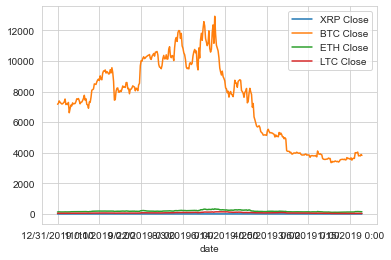

In [67]:
cleaned_19_df.plot.line(x="date", y=["XRP Close", "BTC Close", "ETH Close", "LTC Close"])

